In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy


In [2]:
missing = ['?']
data = pd.read_csv(r'C:\Users\gaura\OneDrive\Desktop\Fast Track Program Project\adult.csv', na_values=missing)

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
col_names = [col.lower().replace('-','_') for col in data.columns]

In [5]:
data.columns = col_names

In [6]:
columns  = [i for i in data.columns]

In [7]:
for i in columns:
    print(i)
    print()
    print(data[i].unique())
    print()
    print('*'*15)
    print()

age

[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]

***************

workclass

['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

***************

fnlwgt

[226802  89814 336951 ... 129912 255835 257302]

***************

education

['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

***************

educational_num

[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]

***************

marital_status

['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

***************

occupation

['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Pr

In [8]:
data.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational_num  48842 non-null  int64 
 5   marital_status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital_gain     48842 non-null  int64 
 11  capital_loss     48842 non-null  int64 
 12  hours_per_week   48842 non-null  int64 
 13  native_country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
data.shape

(48842, 15)

In [11]:
data['age'] = data['age'].apply(lambda x : round(x,0))

In [12]:
percent_missing = round(100*(data.isnull().sum()/len(data.index)),2)

In [13]:
percent_missing

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational_num    0.00
marital_status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital_gain       0.00
capital_loss       0.00
hours_per_week     0.00
native_country     1.75
income             0.00
dtype: float64

In [14]:
data.dropna(how = 'any',inplace = True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational_num  45222 non-null  int64 
 5   marital_status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital_gain     45222 non-null  int64 
 11  capital_loss     45222 non-null  int64 
 12  hours_per_week   45222 non-null  int64 
 13  native_country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [16]:
data['age'] = np.log(data['age'])

In [17]:
data['fnlwgt'] = np.log(data['fnlwgt'])

In [18]:
Q1 = data['capital_gain'].quantile(0.05)
Q3 = data['capital_gain'].quantile(0.95)
IQR = Q3 - Q1
lbound = Q1 - (1.5*IQR)
ubound = Q3 + (1.5*IQR)

print("IQR is : ",IQR)
#[data.iloc[val].index for val in data['capital_gain'] if val>lbound or val<ubound]

index_ = data[(data['capital_gain']<lbound)|(data['capital_gain']>ubound)].index
data.drop(index_,inplace=True)


IQR is :  5013.0


In [19]:
data.shape

(44228, 15)

In [20]:
Q1 = data['capital_loss'].quantile(0.04)
Q3 = data['capital_loss'].quantile(0.96)
IQR = Q3 - Q1
lbound = Q1 - (1.5*IQR)
ubound = Q3 + (1.5*IQR)

print("IQR is : ",IQR)
#[data.iloc[val].index for val in data['capital_gain'] if val>lbound or val<ubound]

index_ = data[(data['capital_loss']<lbound)|(data['capital_loss']>ubound)].index
data.drop(index_,inplace = True)


IQR is :  1602.0


In [21]:
data.shape

(44227, 15)

In [22]:
data['income'] = data['income'].apply(lambda x :'0' if x=='<=50K' else('1' if x== '>50K'else x)) 

In [23]:
data['income'] = data['income'].apply(lambda x : int(x))    

In [24]:
data['income'].unique()

array([0, 1], dtype=int64)

In [25]:
data

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,3.218876,Private,12.331833,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,3.637586,Private,11.405496,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,3.332205,Local-gov,12.727693,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,3.784190,Private,11.984946,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,3.526361,Private,12.199516,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,3.091042,Private,12.644818,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
48837,3.295837,Private,12.458006,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,3.688879,Private,11.947134,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,4.060443,Private,11.931044,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


# EDA 

## Univariate Analysis

### People with Craft-repair occupation is highest 5956

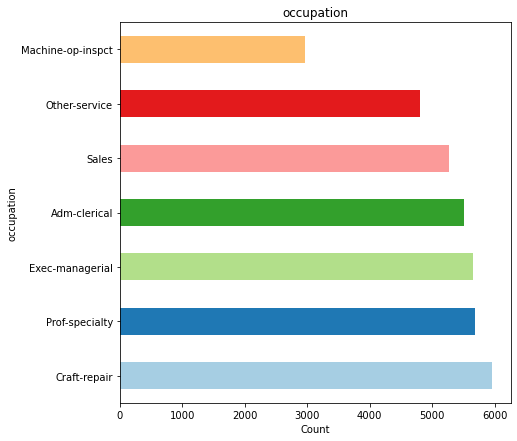

In [26]:
plt.figure(figsize=(7,7))
data.occupation.value_counts().head(7).plot(kind = "barh",color=sns.color_palette('Paired'))
plt.ylabel("occupation")
plt.xlabel("Count")
plt.title("occupation")
plt.show()

    

In [27]:
data.occupation.value_counts()

Craft-repair         5956
Prof-specialty       5677
Exec-managerial      5660
Adm-clerical         5503
Sales                5265
Other-service        4797
Machine-op-inspct    2965
Transport-moving     2298
Handlers-cleaners    2041
Farming-fishing      1460
Tech-support         1399
Protective-serv       961
Priv-house-serv       231
Armed-Forces           14
Name: occupation, dtype: int64

### It is been observed that most of the people are working between 35 to 45 hours per week

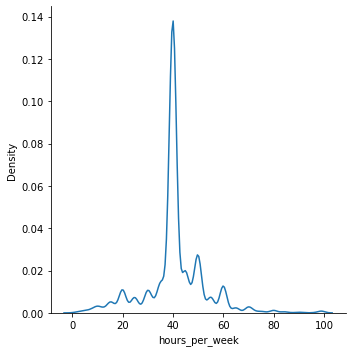

In [28]:
sns.displot(data['hours_per_week'],kind = 'kde');

### Most of the employess belong to HS-grad education

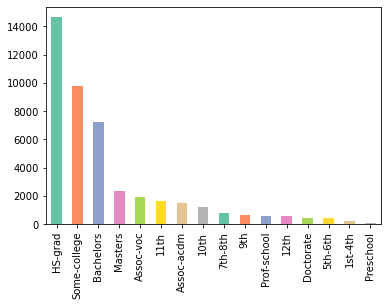

In [29]:
data['education'].value_counts().plot(kind='bar',color=sns.color_palette("Set2"));

### Most of the employee belongs to private jobs category

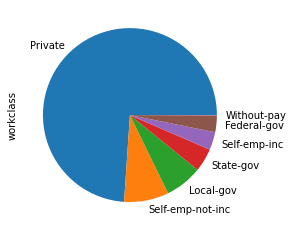

In [30]:
data['workclass'].value_counts().plot(kind = 'pie');

### Most of the peoples are Married-Civ-Spouse

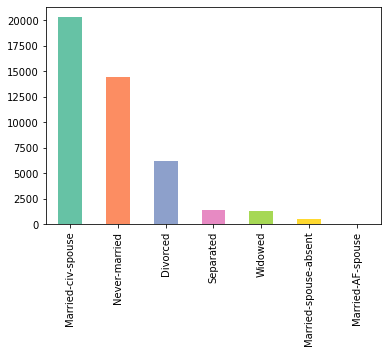

In [31]:
data['marital_status'].value_counts().plot(kind='bar',color=sns.color_palette("Set2"));

### Most number of males are working

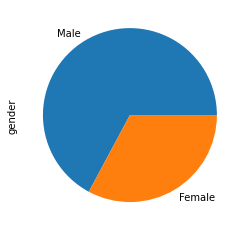

In [32]:
data['gender'].value_counts().plot(kind = 'pie');

### Most of the people are from United States

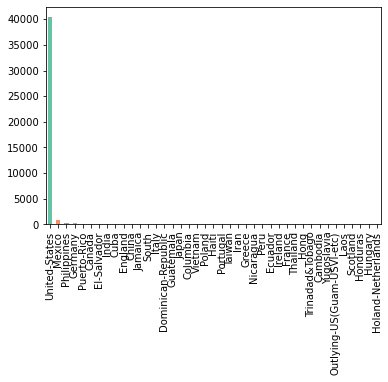

In [33]:
data['native_country'].value_counts().plot(kind='bar',color=sns.color_palette("Set2"));

### Most of the adult are belonging to White race

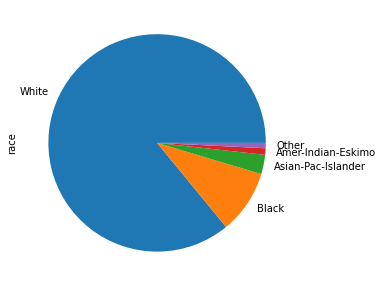

In [34]:
plt.figure(figsize = (5,5))
data['race'].value_counts().plot(kind = 'pie');

### The mean working per week is 40.78 hr

In [35]:
data['hours_per_week'].mean()

40.78167182942546

## Bivariate Analysis

### More number of males are working for longer period of time as compared to females

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


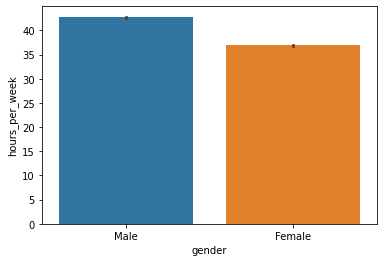

In [36]:
sns.barplot(data['gender'],data['hours_per_week']);


### Males with occupation of Farming- Fishing are working for longer period of time 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


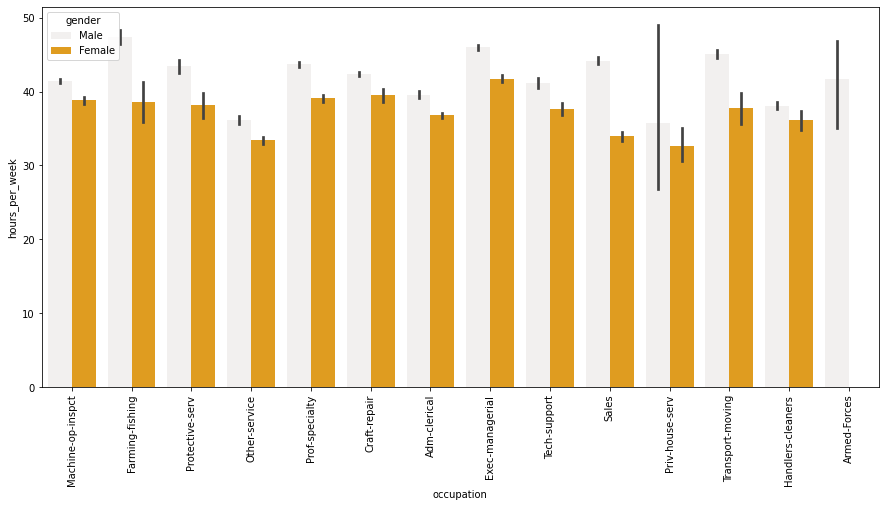

In [37]:

plt.figure(figsize =(15,7))

sns.barplot(data['occupation'],data['hours_per_week'],hue = data['gender'],color = 'orange');

plt.xticks(rotation = 90)

plt.xlabel('occupation')
plt.ylabel('hours_per_week')
plt.show()

### Male with the marital status of Married-AF-Spouse is working more per week

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


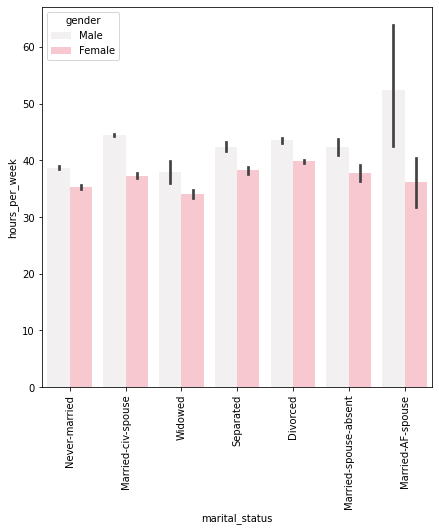

In [38]:
plt.figure(figsize =(7,7))

sns.barplot(data['marital_status'],data['hours_per_week'],hue = data['gender'],color = 'pink')
plt.xticks(rotation = 90)

plt.xlabel('marital_status')
plt.ylabel('hours_per_week')
plt.show()

### People with marital status of Maried-Spouse-absent is of high income group also working around 45 to 50 hr

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


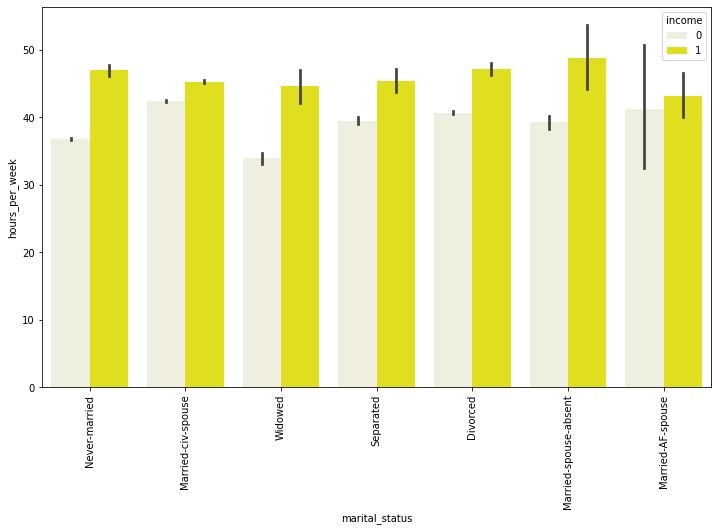

In [39]:
plt.figure(figsize =(12,7))

sns.barplot(data['marital_status'],data['hours_per_week'],hue = data['income'],color='yellow')
plt.xticks(rotation = 90)

plt.xlabel('marital_status')
plt.ylabel('hours_per_week')
plt.show()

### Male with Farming - Fishing has has highest income

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


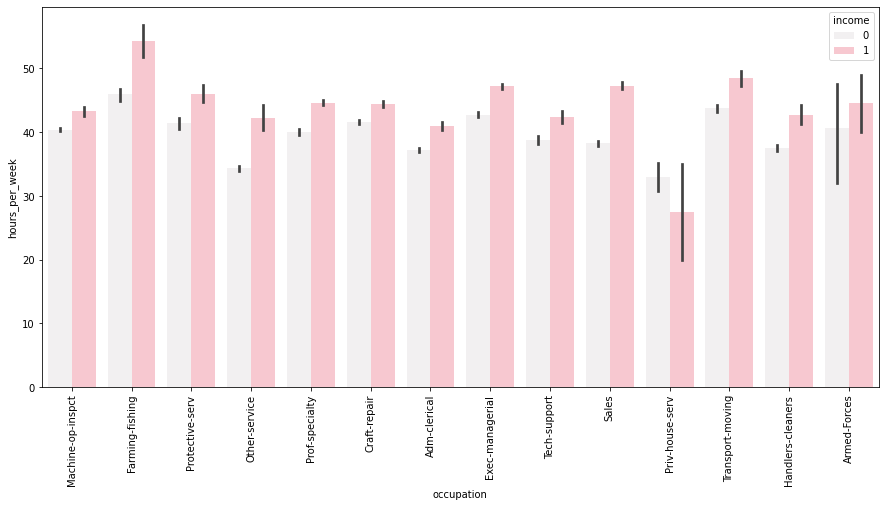

In [40]:
plt.figure(figsize =(15,7))

sns.barplot(data['occupation'],data['hours_per_week'],hue = data['income'],color='pink')
plt.xticks(rotation = 90)

plt.xlabel('occupation')
plt.ylabel('hours_per_week')
plt.show()

### Maximum Mens with the occupation of Craft-repair works with 40 hr per week

In [41]:
data[data['occupation'] == 'Craft-repair'].hours_per_week.value_counts().head()

40    3527
50     512
45     386
60     222
35     194
Name: hours_per_week, dtype: int64

### Most of Mens with the occupation of 'Craft-repair' has the HS-grad of Education

In [42]:
data[data['occupation'] == 'Craft-repair'].education.value_counts().head()

HS-grad         2852
Some-college    1229
Assoc-voc        369
Bachelors        307
11th             263
Name: education, dtype: int64

### Most of Mens with Private job works for 40 hr per week

In [43]:
data[data['workclass'] == 'Private'].hours_per_week.value_counts().head()

40    16137
50     2651
45     1931
35     1244
20     1198
Name: hours_per_week, dtype: int64

### Most of the men working in private jobs are having the education of HS-grad

In [44]:
data[data['workclass'] == 'Private'].education.value_counts().head()

HS-grad         11450
Some-college     7357
Bachelors        4943
Assoc-voc        1450
11th             1401
Name: education, dtype: int64

### Even though the income varry a lot though the working hour for high and low income group is similar

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


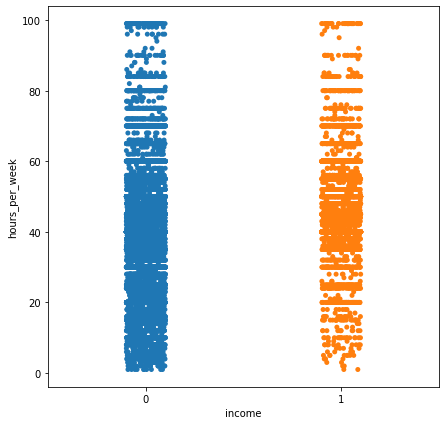

In [45]:
plt.figure(figsize = (7,7))
sns.stripplot(data['income'],data['hours_per_week']);

### The Maximum time people with income group 1 and 0 works for 90 hr per week  

In [46]:
data[data['income']==1].hours_per_week.max()

99

In [47]:
data[data['income']==0].hours_per_week.max()

99

### The Minimum time people with income group 1 and 0 works for 90 hr per week  

In [48]:
data[data['income']==1].hours_per_week.min()

1

In [49]:
data[data['income']==0].hours_per_week.min()

1

## Multivariate analysis

In [50]:
data.describe()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,income
count,44227.000000,44227.000000,44227.000000,44227.000000,44227.000000,44227.000000,44227.000000
mean,3.587138,11.983357,10.061614,322.087051,90.490108,40.781672,0.231126
std,0.350866,0.630617,2.528887,1383.043306,408.762908,11.960777,0.421557
min,2.833213,9.509852,1.000000,0.000000,0.000000,1.000000,0.000000
25%,3.332205,11.673142,9.000000,0.000000,0.000000,40.000000,0.000000
50%,3.610918,12.091727,10.000000,0.000000,0.000000,40.000000,0.000000
75%,3.850148,12.380272,12.000000,0.000000,0.000000,45.000000,0.000000
max,4.499810,14.214555,16.000000,11678.000000,3900.000000,99.000000,1.000000


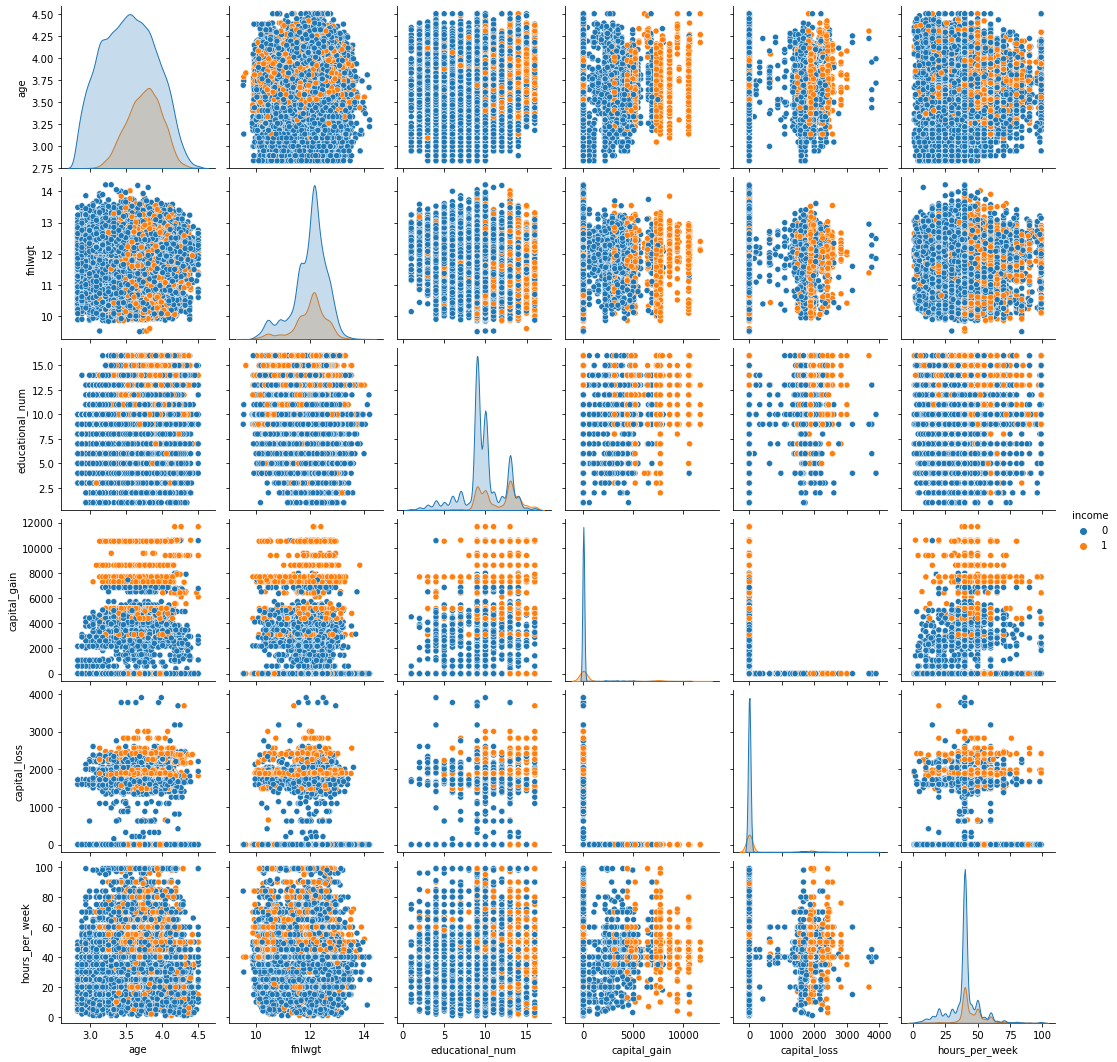

In [51]:
# There is not such pattern observed between the given columns
sns.pairplot(data,hue='income')


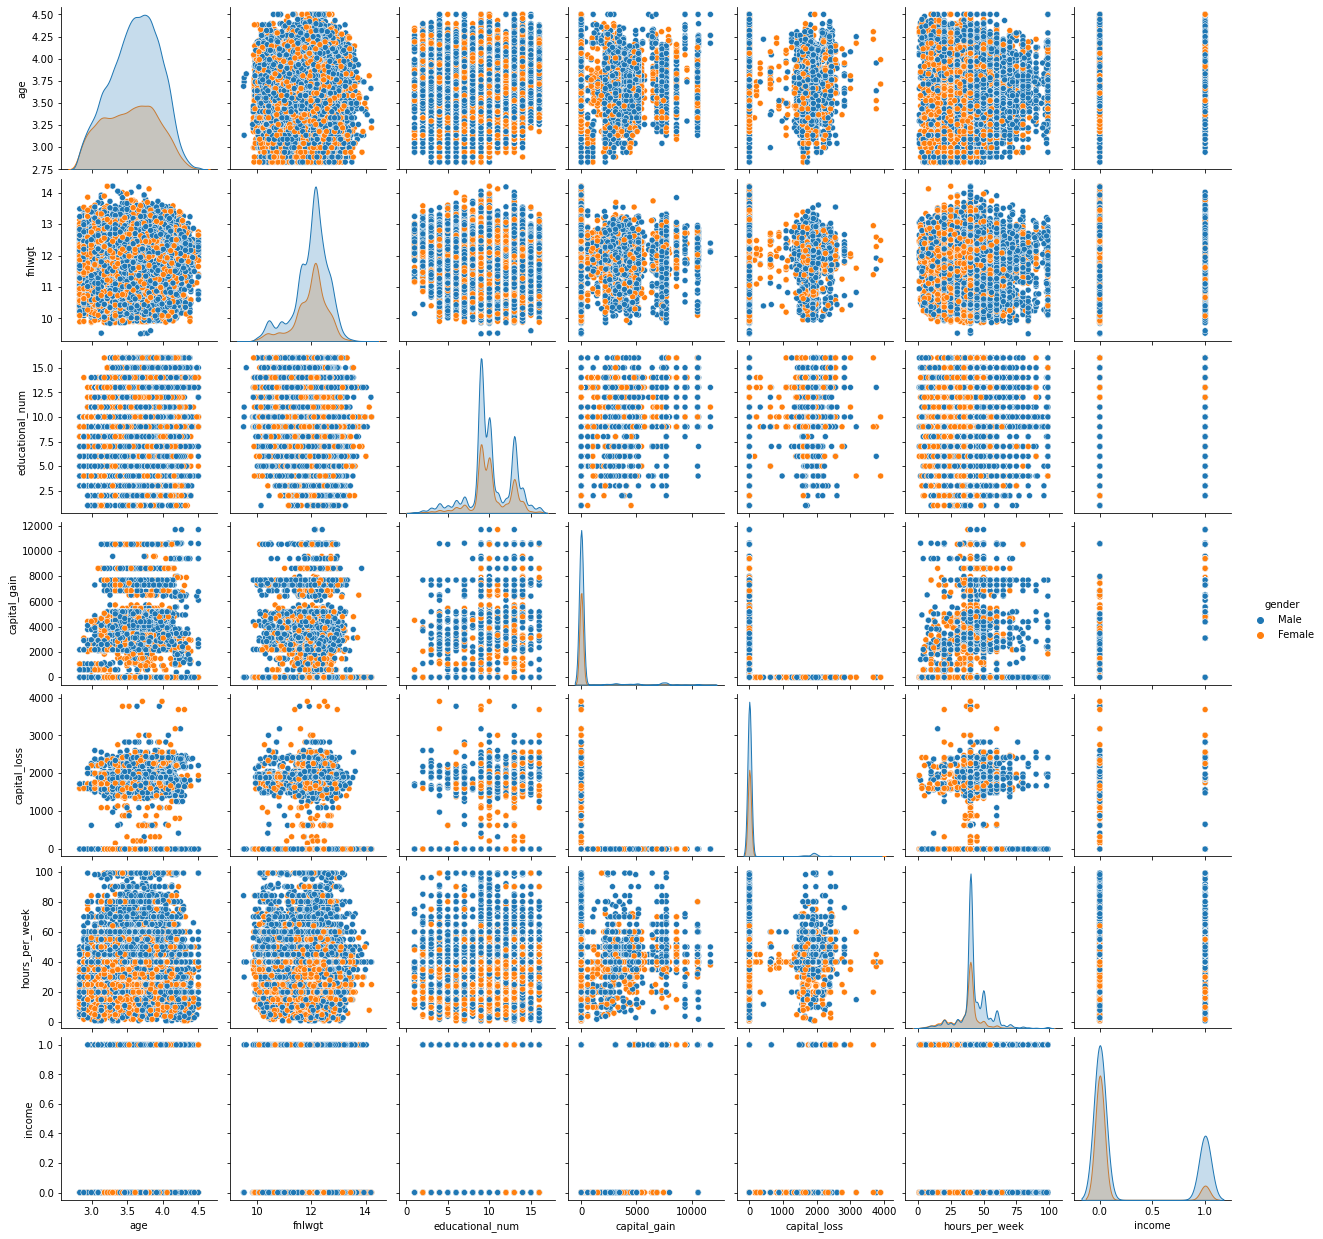

In [52]:
sns.pairplot(data,hue='gender')


# Hypothesis Testing

### Using Chi-Square Testing

In [53]:
data.groupby(['gender','occupation']).count()['age']

gender  occupation       
Female  Adm-clerical         3706
        Craft-repair          311
        Exec-managerial      1672
        Farming-fishing        93
        Handlers-cleaners     252
        Machine-op-inspct     792
        Other-service        2636
        Priv-house-serv       217
        Prof-specialty       2145
        Protective-serv       119
        Sales                1905
        Tech-support          551
        Transport-moving      123
Male    Adm-clerical         1797
        Armed-Forces           14
        Craft-repair         5645
        Exec-managerial      3988
        Farming-fishing      1367
        Handlers-cleaners    1789
        Machine-op-inspct    2173
        Other-service        2161
        Priv-house-serv        14
        Prof-specialty       3532
        Protective-serv       842
        Sales                3360
        Tech-support          848
        Transport-moving     2175
Name: age, dtype: int64

### Is there a relationship between occupation and gender?

In [54]:
crtab = pd.crosstab(data['occupation'],data['gender'])
crtab

gender,Female,Male
occupation,,
Adm-clerical,3706,1797
Armed-Forces,0,14
Craft-repair,311,5645
Exec-managerial,1672,3988
Farming-fishing,93,1367
Handlers-cleaners,252,1789
Machine-op-inspct,792,2173
Other-service,2636,2161
Priv-house-serv,217,14


In [55]:
from scipy import stats

In [56]:
test_statistic,p,dof,_=stats.chi2_contingency(crtab)
p

0.0

In [57]:
if p <0.05:
    print('There is no relation between the two variable')
else:
    print('There is some significance relation between the two variables')

There is no relation between the two variable


### Is there a relationship between gender and income?

In [58]:
crtab = pd.crosstab(data['occupation'],data['gender'])
crtab

gender,Female,Male
occupation,,
Adm-clerical,3706,1797
Armed-Forces,0,14
Craft-repair,311,5645
Exec-managerial,1672,3988
Farming-fishing,93,1367
Handlers-cleaners,252,1789
Machine-op-inspct,792,2173
Other-service,2636,2161
Priv-house-serv,217,14


In [59]:
test_statistic,p,dof,_=stats.chi2_contingency(crtab)
p

0.0

In [60]:
if p <0.05:
    print('There is no relation between the two variable')
else:
    print('There is some significance relation between the two variables')

There is no relation between the two variable


# Preprocessing

## Making Models

### Splitting Test and Train

In [61]:
X = data.drop('income',axis = 1)

In [62]:
y = data['income']

In [63]:
X.drop('native_country',axis = 1,inplace = True)

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1234)

### Seperating Categorical and Numerical Column

In [65]:
X_train_num = X_train.select_dtypes(include = ['int64','float64'])


In [66]:
X_train_cat = X_train.select_dtypes(include = 'object')

### Using Standard scalar for Numerical Data

In [67]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train_num_df = pd.DataFrame(scalar.fit_transform(X_train_num,y_train),columns=X_train_num.columns,index = X_train_num.index)
X_train_num_df.head()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week
22721,-1.170181,0.019199,-0.415423,-0.234519,-0.220489,0.776571
11322,0.139816,0.481889,-0.415423,-0.234519,4.052970,-0.061219
37218,-0.262359,0.095560,1.162767,-0.234519,-0.220489,0.776571
30705,-0.440587,0.784613,-0.415423,-0.234519,-0.220489,-0.061219
13419,1.088266,-0.752047,-0.415423,-0.234519,-0.220489,3.289942


### Using Label Encoding for Categorical data

In [68]:
X_train_cat

,workclass,education,marital_status,occupation,relationship,race,gender
22721,Self-emp-not-inc,HS-grad,Never-married,Craft-repair,Own-child,White,Male
11322,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male
37218,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male
30705,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male
13419,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male
...,...,...,...,...,...,...,...
35764,Private,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male
18858,Private,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female
26454,Self-emp-not-inc,HS-grad,Divorced,Sales,Not-in-family,White,Male
37624,Private,Bachelors,Married-civ-spouse,Sales,Husband,White,Male


In [69]:
X_train_cat.workclass.unique()

array(['Self-emp-not-inc', 'Private', 'Self-emp-inc', 'Federal-gov',
       'State-gov', 'Local-gov', 'Without-pay'], dtype=object)

In [70]:
workclass_num ={'Self-emp-not-inc':0,'Private':1,'Self-emp-inc':2,'Federal-gov':3,'State-gov':4,'Local-gov':5,'Without-pay':6}

In [71]:
X_train_cat.workclass = X_train_cat.workclass.apply(lambda x: workclass_num[x])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [72]:
X_train_cat.education.unique()

array(['HS-grad', 'Bachelors', 'Some-college', '10th', 'Assoc-acdm',
       'Masters', '12th', '11th', 'Assoc-voc', '7th-8th', 'Prof-school',
       'Doctorate', '9th', '5th-6th', 'Preschool', '1st-4th'],
      dtype=object)

In [73]:
education_num ={'HS-grad':8,'Bachelors':9,'Some-college':14,'10th':5,'Assoc-acdm':12,'Masters':11,'12th':7,
                '11th':6,'Assoc-voc':13,'7th-8th':3,'Prof-school':10,'Doctorate':11,'9th':4,'5th-6th':2
               ,'Preschool':0,'1st-4th':1}

In [74]:
X_train_cat.education = X_train_cat.education.apply(lambda x: education_num[x])

In [75]:
X_train_cat.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Separated', 'Divorced',
       'Married-spouse-absent', 'Widowed', 'Married-AF-spouse'],
      dtype=object)

In [76]:
marital_status_num ={'Never-married':0,'Married-civ-spouse':1,'Separated':2,'Divorced':3,'Married-spouse-absent':4,'Widowed':5,
                     'Married-AF-spouse':6}

In [77]:
X_train_cat.marital_status = X_train_cat.marital_status.apply(lambda x: marital_status_num[x])

In [78]:
X_train_cat.occupation.unique()

array(['Craft-repair', 'Machine-op-inspct', 'Exec-managerial', 'Sales',
       'Transport-moving', 'Tech-support', 'Handlers-cleaners',
       'Other-service', 'Adm-clerical', 'Prof-specialty',
       'Protective-serv', 'Farming-fishing', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

In [79]:
occupation_num ={'Craft-repair':0,'Machine-op-inspct':1,'Exec-managerial':2,'Sales':3,'Transport-moving':4,'Tech-support':5,
                 'Handlers-cleaners':6,'Other-service':7,'Adm-clerical':8,'Prof-specialty':9,'Protective-serv':10,'Farming-fishing':11,
                 'Priv-house-serv':12,'Armed-Forces':13}

In [80]:
X_train_cat.occupation = X_train_cat.occupation.apply(lambda x: occupation_num[x])

In [81]:
X_train_cat.relationship.unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Wife', 'Other-relative',
       'Unmarried'], dtype=object)

In [82]:
relationship_num ={'Own-child':0,'Husband':1,'Not-in-family':2,'Wife':3,'Other-relative':4,'Unmarried':5}

In [83]:
X_train_cat.relationship = X_train_cat.relationship.apply(lambda x: relationship_num[x])

In [84]:
X_train_cat.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [85]:
race_num ={'White':0,'Black':1,'Asian-Pac-Islander':2,'Amer-Indian-Eskimo':3,'Other':4}

In [86]:
X_train_cat.race = X_train_cat.race.apply(lambda x: race_num[x])

In [87]:
X_train_cat.gender.unique()

array(['Male', 'Female'], dtype=object)

In [88]:
gender_num ={'Male':0,'Female':1}

In [89]:
X_train_cat.gender = X_train_cat.gender.apply(lambda x: gender_num[x])

In [90]:
X_train = pd.concat([X_train_cat,X_train_num],axis = 1)

In [91]:
X_train

,workclass,education,marital_status,occupation,relationship,race,gender,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week
22721,0,8,0,0,0,0,0,3.178054,11.992310,9,0,0,50
11322,1,8,1,1,1,1,0,3.637586,12.284815,9,0,1740,40
37218,1,9,1,2,1,0,0,3.496508,12.040585,13,0,0,50
30705,1,8,1,1,1,1,0,3.433987,12.476191,9,0,0,40
13419,2,8,1,0,1,0,0,3.970292,11.504742,9,0,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35764,1,9,1,8,1,0,0,3.970292,11.466557,13,0,1902,40
18858,1,8,3,8,5,0,1,3.871201,12.245034,9,0,0,52
26454,0,8,3,3,2,0,0,3.891820,11.567546,9,0,0,50
37624,1,9,1,3,1,0,0,4.369448,12.491699,13,0,0,40


### Preprocessing Test Data

In [92]:
X_test_num = X_test.select_dtypes(include = ['int64','float64'])


In [93]:
X_test_cat = X_test.select_dtypes(include = 'object')

In [94]:
X_test_num

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week
38394,3.496508,12.116104,9,0,0,40
25090,3.526361,12.675620,16,0,0,40
48254,3.135494,12.483272,10,0,0,20
3913,3.178054,11.664427,9,0,2339,40
15201,3.135494,13.012607,11,0,0,45
...,...,...,...,...,...,...
40807,3.912023,12.070568,10,0,0,45
8420,3.663562,12.512122,9,0,0,60
39892,3.970292,11.747096,9,0,0,40
36248,3.610918,11.930128,4,0,0,40


In [95]:
from sklearn.preprocessing import StandardScaler
X_test_num_df = pd.DataFrame(scalar.transform(X_test_num),columns=X_test_num.columns,index = X_test_num.index)

In [96]:
X_test_cat.workclass = X_test_cat.workclass.apply(lambda x: workclass_num[x])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [240]:
X_train_cat.education.unique()

array([ 8,  9, 14,  5, 12, 11,  7,  6, 13,  3, 10,  4,  2,  0,  1],
      dtype=int64)

In [97]:
X_test_cat.education.unique()

array(['HS-grad', 'Doctorate', 'Some-college', 'Assoc-voc', '10th',
       '11th', '12th', 'Masters', 'Assoc-acdm', 'Bachelors', '1st-4th',
       '7th-8th', '5th-6th', '9th', 'Prof-school', 'Preschool'],
      dtype=object)

In [98]:
X_test_cat.education = X_test_cat.education.apply(lambda x: education_num[x])

In [99]:
X_test_cat.marital_status = X_test_cat.marital_status.apply(lambda x: marital_status_num[x])

In [100]:
X_test_cat.occupation = X_test_cat.occupation.apply(lambda x: occupation_num[x])

In [101]:
X_test_cat.relationship = X_test_cat.relationship.apply(lambda x: relationship_num[x])

In [102]:
X_test_cat.race = X_test_cat.race.apply(lambda x: race_num[x])

In [103]:
X_test_cat.gender = X_test_cat.gender.apply(lambda x: gender_num[x])

In [104]:
X_test = pd.concat([X_test_cat,X_test_num],axis = 1)

In [105]:
y_train.value_counts(normalize=True)

0    0.76934
1    0.23066
Name: income, dtype: float64

# Model Building without Hyperparameter Tunning

## Using SVC with rbf kernel


In [106]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [107]:
y_train_predict = svc.predict(X_train)

In [1]:
from sklearn.metrics import accuracy_score

score1 = accuracy_score(y_train,y_train_predict)

score1

NameError: name 'y_train' is not defined

In [109]:
y_test_predict = svc.predict(X_test)

In [110]:

from sklearn.metrics import accuracy_score

score2 = accuracy_score(y_test,y_test_predict)

score2

0.8008501401826897

In [111]:
from sklearn import metrics
confusion_mat = metrics.confusion_matrix(y_test, y_test_predict)
confusion_mat

array([[8362,  124],
       [2078,  493]], dtype=int64)

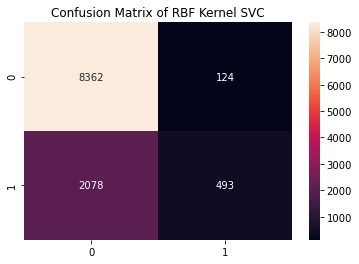

In [112]:
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.title("Confusion Matrix of RBF Kernel SVC")
plt.show()

In [113]:
print(metrics.classification_report(y_test,y_test_predict))


              precision    recall  f1-score   support

           0       0.80      0.99      0.88      8486
           1       0.80      0.19      0.31      2571

    accuracy                           0.80     11057
   macro avg       0.80      0.59      0.60     11057
weighted avg       0.80      0.80      0.75     11057



## Using Logistic Regression


In [114]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

logistic.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:
y_train_predict = logistic.predict(X_train)

In [116]:
from sklearn.metrics import accuracy_score

score1 = accuracy_score(y_train,y_train_predict)
score1

0.8077479650286403

In [117]:
y_test_predict = logistic.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score

score2 = accuracy_score(y_test,y_test_predict)
score2

0.8021163064122275

In [119]:
conf_matrix =  metrics.confusion_matrix(y_test,y_test_predict)


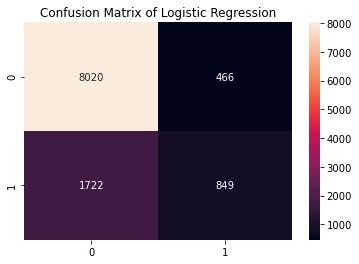

In [120]:
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

In [121]:
print(metrics.classification_report(y_test,y_test_predict))


              precision    recall  f1-score   support

           0       0.82      0.95      0.88      8486
           1       0.65      0.33      0.44      2571

    accuracy                           0.80     11057
   macro avg       0.73      0.64      0.66     11057
weighted avg       0.78      0.80      0.78     11057



## Using KNN


In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [123]:
y_train_predict = knn.predict(X_train)

In [124]:
from sklearn.metrics import accuracy_score

score1 = accuracy_score(y_train,y_train_predict)
score1

0.8869460355743142

In [125]:
y_test_predict = knn.predict(X_test)

In [126]:
from sklearn.metrics import accuracy_score

score2 = accuracy_score(y_test,y_test_predict)
score2

0.840282174188297

In [127]:
con_mat = metrics.confusion_matrix(y_test,y_test_predict)


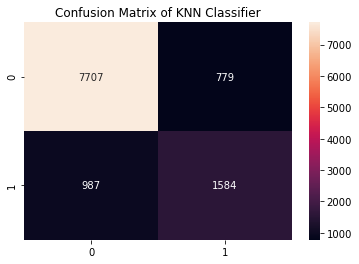

In [128]:
sns.heatmap(con_mat, annot=True, fmt='d')
plt.title("Confusion Matrix of KNN Classifier")
plt.show()

In [129]:
print(metrics.classification_report(y_test,y_test_predict))


              precision    recall  f1-score   support

           0       0.89      0.91      0.90      8486
           1       0.67      0.62      0.64      2571

    accuracy                           0.84     11057
   macro avg       0.78      0.76      0.77     11057
weighted avg       0.84      0.84      0.84     11057



## Using Decision Tree


In [242]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [243]:
y_train_predict = tree.predict(X_train)

In [244]:
from sklearn.metrics import accuracy_score

score1 = accuracy_score(y_train,y_train_predict)
score1

0.8558637322882122

In [245]:
y_test_predict = tree.predict(X_test)

In [246]:
from sklearn.metrics import accuracy_score

score2 = accuracy_score(y_test,y_test_predict)
score2

0.8349461879352447

In [247]:
con_mat = metrics.confusion_matrix(y_test,y_test_predict)


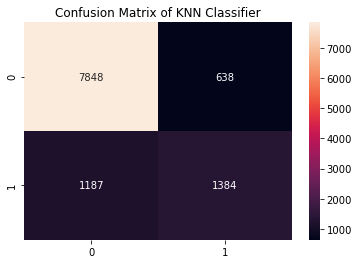

In [248]:
sns.heatmap(con_mat, annot=True, fmt='d')
plt.title("Confusion Matrix of Decision Tree")
plt.show()

In [249]:
print(metrics.classification_report(y_test,y_test_predict))


              precision    recall  f1-score   support

           0       0.87      0.92      0.90      8486
           1       0.68      0.54      0.60      2571

    accuracy                           0.83     11057
   macro avg       0.78      0.73      0.75     11057
weighted avg       0.83      0.83      0.83     11057



## Using Naive Bayes

In [138]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()

naive.fit(X_train,y_train)

GaussianNB()

In [139]:
y_train_predict = naive.predict(X_train)

In [140]:
score1 = accuracy_score(y_train,y_train_predict)
score1

0.8113053964425686

In [141]:
y_test_predict = naive.predict(X_test)

In [142]:
score2 = accuracy_score(y_test,y_test_predict)
score2

0.807000090440445

In [143]:
con_mat = metrics.confusion_matrix(y_test,y_test_predict)


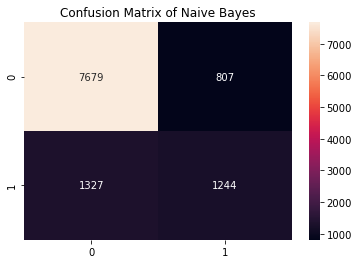

In [144]:
sns.heatmap(con_mat, annot=True, fmt='d')
plt.title("Confusion Matrix of Naive Bayes")
plt.show()

In [145]:
print(metrics.classification_report(y_test,y_test_predict))


              precision    recall  f1-score   support

           0       0.85      0.90      0.88      8486
           1       0.61      0.48      0.54      2571

    accuracy                           0.81     11057
   macro avg       0.73      0.69      0.71     11057
weighted avg       0.80      0.81      0.80     11057



## Using Ensemble Technique

## Bagging - RandomForestClassifier 


In [146]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [147]:
y_train_pred = rfc.predict(X_train)

In [148]:
score1 = accuracy_score(y_train,y_train_pred)
score1

0.9999095568284595

In [149]:
y_test_pred = rfc.predict(X_test)

In [150]:
score2 = accuracy_score(y_test,y_test_pred)
score2

0.8475174097856562

In [151]:
con_matrix = metrics.confusion_matrix(y_test,y_test_pred)

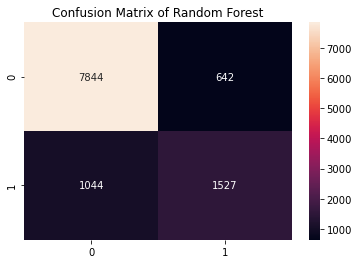

In [152]:
sns.heatmap(con_matrix,annot=True, fmt='d')
plt.title("Confusion Matrix of Random Forest")
plt.show()

## Boosting Technique - XGBoost


In [153]:
! pip install xgboost


In [154]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [155]:
model_xgb = XGBClassifier()

model_xgb.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [156]:
y_train_pred = model_xgb.predict(X_train)

In [157]:
score1 = accuracy_score(y_train,y_train_pred)
score1

0.8988543864938198

In [158]:
y_test_pred = model_xgb.predict(X_test)

In [159]:
score = accuracy_score(y_test,y_test_pred)
score2

0.8475174097856562

In [160]:
con_matrix = metrics.confusion_matrix(y_test,y_test_pred)

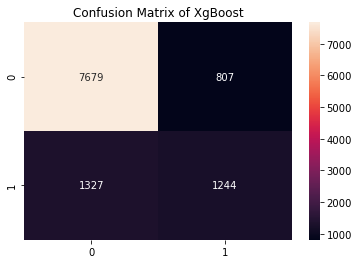

In [161]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title('Confusion Matrix of XgBoost')
plt.show()

# Resolving Underfitting Overfitting Issue Using Grid Search 

## For Logistics Regression

In [162]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report


In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
tuned_parameters = [{'C':[0.001,0.01,0.1,1,10,100,1000]}]

grid = GridSearchCV(
    estimator= LogisticRegression(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [165]:
print("Best parameters set found on train set:")
print(grid.best_params_)
print(grid.best_estimator_)
print()

print('Score on Test Data: ', grid.score(X_test, y_test))

Best parameters set found on train set:
{'C': 0.1}
LogisticRegression(C=0.1)

Score on Test Data:  0.8021163064122275


## Best parameters set found on train set: {'C': 0.1}

In [166]:
cv_results = pd.DataFrame(grid.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.232206,0.005562,0.003618,0.003657,0.001,{'C': 0.001},0.806753,0.802683,0.802834,0.810522,...,0.805668,0.002888,7,0.808260,0.807431,0.802269,0.807205,0.808298,0.806693,0.002255
1,0.212182,0.012604,0.006389,0.003195,0.01,{'C': 0.01},0.809165,0.800724,0.806301,0.807658,...,0.806030,0.002856,6,0.809014,0.806640,0.807017,0.805133,0.808524,0.807266,0.001389
2,0.217352,0.017018,0.003097,0.003797,0.1,{'C': 0.1},0.808110,0.808713,0.807959,0.811275,...,0.809074,0.001201,1,0.808562,0.808411,0.808147,0.807808,0.809127,0.808411,0.000440
3,0.219850,0.011473,0.005271,0.003422,1,{'C': 1},0.809165,0.809768,0.804944,0.811275,...,0.808683,0.002111,2,0.808411,0.808863,0.807997,0.807658,0.809240,0.808434,0.000571
4,0.203927,0.014388,0.005525,0.007702,10,{'C': 10},0.808260,0.800724,0.807959,0.810974,...,0.806693,0.003445,5,0.808449,0.806565,0.808298,0.807658,0.808826,0.807959,0.000793


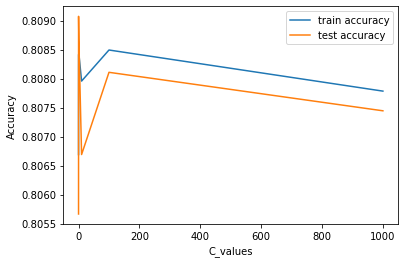

In [167]:
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.xlabel('C_values')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')
plt.show()

## Using Hyperparameter for Logistic Regression Model and Checking Accuracy

In [168]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(C=0.1)

logistic.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [169]:
y_train_predict = logistic.predict(X_train)

In [170]:
from sklearn.metrics import accuracy_score

score1 = accuracy_score(y_train,y_train_predict)
score1

0.8082604763340367

In [171]:
y_test_predict = logistic.predict(X_test)

In [172]:
from sklearn.metrics import accuracy_score

score2 = accuracy_score(y_test,y_test_predict)
score2

0.8021163064122275

In [173]:
conf_matrix =  metrics.confusion_matrix(y_test,y_test_predict)


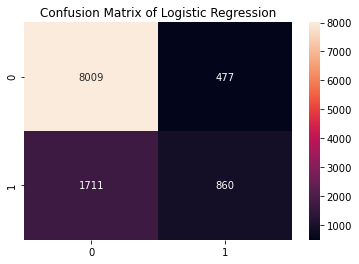

In [174]:
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

In [175]:
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      8486
           1       0.64      0.33      0.44      2571

    accuracy                           0.80     11057
   macro avg       0.73      0.64      0.66     11057
weighted avg       0.78      0.80      0.78     11057



## For Naive bayes


In [176]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [177]:
from sklearn.naive_bayes import MultinomialNB

In [178]:
tuned_parameters = [{'alpha':[0.001,0.01,0.1,1,10,100,1000]}]

nbc= GridSearchCV(
    estimator= MultinomialNB(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
nbc.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [179]:
print("Best parameters set found on train set")
print(nbc.best_params_)
print(nbc.best_estimator_)
print()
print('Score on Test Data: ', nbc.score(X_test, y_test))

Best parameters set found on train set
{'alpha': 0.001}
MultinomialNB(alpha=0.001)

Score on Test Data:  0.7676584968798047


## Best parameters set found on train set {'alpha': 0.001}

In [180]:
cv_results = pd.DataFrame(nbc.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014318,0.005979,0.000000,0.000000,0.001,{'alpha': 0.001},0.769521,0.764094,0.770274,0.768315,...,0.768978,0.002829,1,0.768842,0.770199,0.768654,0.769144,0.768051,0.768978,0.000707
1,0.009837,0.005782,0.001600,0.003201,0.01,{'alpha': 0.01},0.769521,0.764094,0.770274,0.768315,...,0.768978,0.002829,1,0.768842,0.770199,0.768654,0.769144,0.768051,0.768978,0.000707
2,0.009376,0.007655,0.003125,0.006250,0.1,{'alpha': 0.1},0.769521,0.764094,0.770274,0.768315,...,0.768978,0.002829,1,0.768842,0.770199,0.768654,0.769144,0.768051,0.768978,0.000707
3,0.009376,0.007655,0.000000,0.000000,1,{'alpha': 1},0.769521,0.764094,0.770274,0.768315,...,0.768978,0.002829,1,0.768842,0.770199,0.768654,0.769144,0.768051,0.768978,0.000707
4,0.009032,0.006114,0.004726,0.006270,10,{'alpha': 10},0.769521,0.764094,0.770274,0.768315,...,0.768978,0.002829,1,0.768842,0.770199,0.768654,0.769144,0.768051,0.768978,0.000707


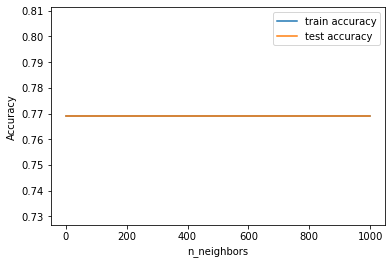

In [181]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')
plt.show()

## Analysing Decision Tree with complete analysis with hyperparameter tunning

In [182]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [184]:
tuned_parameters = [{'max_depth':[i for i in range(1,10)]}]

dtc= GridSearchCV(
    estimator= DecisionTreeClassifier(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

dtc.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [185]:
print("Best parameters set found on train set")
print(dtc.best_params_)
print(dtc.best_estimator_)
print()

print('Score on Test Data: ', dtc.score(X_test, y_test))

Best parameters set found on train set
{'max_depth': 8}
DecisionTreeClassifier(max_depth=8)

Score on Test Data:  0.8442615537668445


In [186]:
cv_results = pd.DataFrame(dtc.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017926,0.003204,0.000000,0.000000,1,{'max_depth': 1},0.769370,0.769370,0.769370,0.769370,...,0.769340,0.000060,9,0.769332,0.769332,0.769332,0.769332,0.769370,0.769340,0.000015
1,0.020333,0.004355,0.001601,0.003203,2,{'max_depth': 2},0.770877,0.770576,0.771179,0.770877,...,0.771028,0.000357,8,0.771179,0.771216,0.771103,0.771103,0.770990,0.771118,0.000078
2,0.031670,0.000772,0.000420,0.000840,3,{'max_depth': 3},0.821827,0.824540,0.821827,0.823033,...,0.823485,0.001684,7,0.825859,0.825143,0.825859,0.822844,0.824276,0.824797,0.001137
3,0.041116,0.009152,0.000405,0.000811,4,{'max_depth': 4},0.834338,0.833434,0.834640,0.836449,...,0.835785,0.002354,6,0.837052,0.837240,0.836976,0.836976,0.836072,0.836863,0.000407
4,0.040030,0.008439,0.006252,0.007657,5,{'max_depth': 5},0.834188,0.834188,0.835243,0.835996,...,0.835906,0.002118,5,0.837881,0.837843,0.837655,0.837692,0.836373,0.837489,0.000564


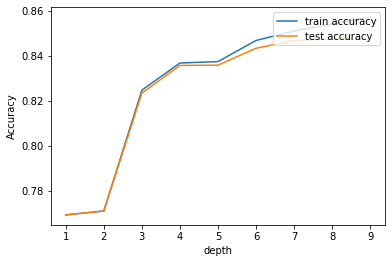

In [187]:
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])

plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')
plt.show()

In [188]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 8)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [189]:
y_train_predict = tree.predict(X_train)

In [190]:
score1 = accuracy_score(y_train,y_train_predict)
score1

0.8527283690081399

In [191]:
y_test_predict = tree.predict(X_test)

In [192]:
score2 = accuracy_score(y_test,y_test_predict)
score2

0.8445328751017455

In [193]:
con_matrix = metrics.confusion_matrix(y_test,y_test_predict)

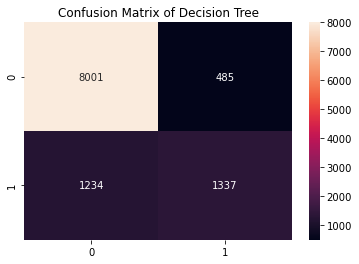

In [194]:
sns.heatmap(con_matrix,annot=True,fmt='d')
plt.title("Confusion Matrix of Decision Tree")
plt.show()

In [195]:
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      8486
           1       0.73      0.52      0.61      2571

    accuracy                           0.84     11057
   macro avg       0.80      0.73      0.76     11057
weighted avg       0.84      0.84      0.83     11057



## Feature importance with DecisionTreeClassifier


In [196]:
tree.feature_importances_

array([1.56989752e-03, 3.19786214e-02, 4.59240439e-01, 4.87111927e-03,
       1.61231017e-03, 3.44339515e-04, 3.36604537e-03, 4.32504487e-02,
       2.42412591e-03, 2.07915413e-01, 1.29719140e-01, 8.04905514e-02,
       3.32175481e-02])

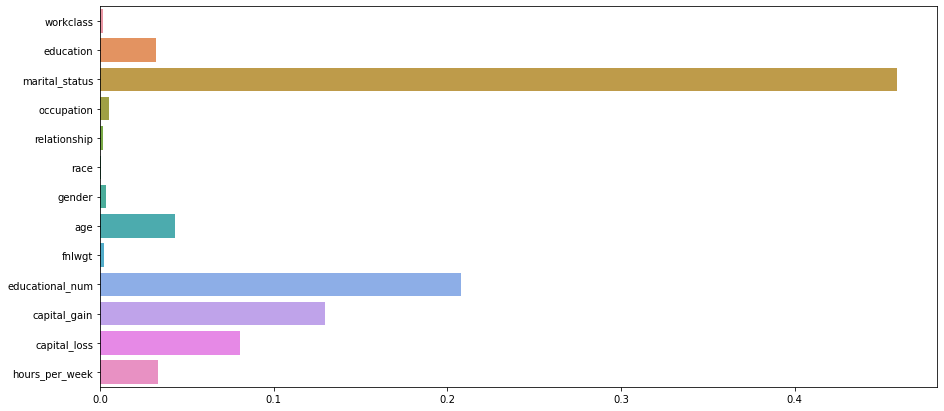

In [197]:
plt.figure(figsize=(15,7))
sns.barplot(x = tree.feature_importances_, y = X_train.columns, )
plt.show();


# Using Ensemble

## Using Boosting - XGBoost with hyperparameter tunning

In [198]:
tuned_parameters = [{'max_depth':[i for i in range(1,10)]}]

grid = GridSearchCV(
    estimator= XGBClassifier(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[11:37:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [199]:
print("Best parameters set found on train set")
print(grid.best_params_)
print(grid.best_estimator_)
print()

print('Score on Test Data: ', grid.score(X_test, y_test))

Best parameters set found on train set
{'max_depth': 3}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Score on Test Data:  0.8617165596454734


## Best parameters set found on train set {'max_depth': 3}

In [200]:
cv_results = pd.DataFrame(grid.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.219806,0.012523,0.008213,0.000427,1,{'max_depth': 1},0.848206,0.848809,0.846397,0.854688,...,0.849503,0.002782,9,0.851786,0.851485,0.850769,0.849450,0.850015,0.850701,0.000876
1,0.336507,0.017211,0.041578,0.071580,2,{'max_depth': 2},0.864185,0.861170,0.859964,0.867802,...,0.862948,0.002790,5,0.866106,0.865466,0.865089,0.865240,0.864448,0.865270,0.000538
2,0.471701,0.019412,0.005013,0.004111,3,{'max_depth': 3},0.867350,0.865390,0.863883,0.870968,...,0.867079,0.002399,1,0.873229,0.871608,0.874661,0.873304,0.873530,0.873267,0.000976
3,0.611096,0.015441,0.008000,0.005060,4,{'max_depth': 4},0.866596,0.865240,0.864486,0.868254,...,0.867079,0.002267,1,0.881406,0.881934,0.881934,0.880803,0.881369,0.881489,0.000421
4,0.758155,0.034312,0.007925,0.004942,5,{'max_depth': 5},0.863129,0.866747,0.864787,0.867501,...,0.866415,0.002322,3,0.891431,0.889998,0.890790,0.888830,0.890752,0.890360,0.000889


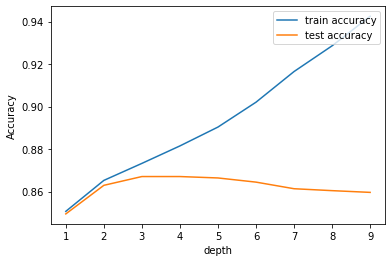

In [201]:
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])

plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')
plt.show()

### Checking XGBoost with hyperparameter

In [202]:
xgb = XGBClassifier(max_depth=3)

xgb.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [203]:
y_train_predict = xgb.predict(X_train)

In [204]:
score1 = accuracy_score(y_train,y_train_predict)
score1

0.8728670485378354

In [205]:
y_test_predict = xgb.predict(X_test)

In [206]:
score2 = accuracy_score(y_test,y_test_predict)
score2

0.8617165596454734

In [207]:
con_matrix = metrics.confusion_matrix(y_test,y_test_predict)

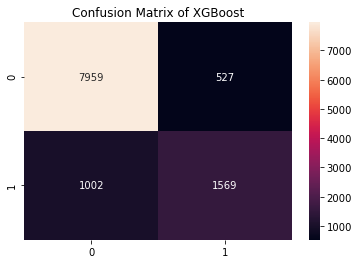

In [208]:
sns.heatmap(con_matrix,annot=True,fmt='d')
plt.title("Confusion Matrix of XGBoost")
plt.show()

In [209]:
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      8486
           1       0.75      0.61      0.67      2571

    accuracy                           0.86     11057
   macro avg       0.82      0.77      0.79     11057
weighted avg       0.86      0.86      0.86     11057



### Using XGBoost feature importance


In [210]:
xgb.feature_importances_

array([0.01788253, 0.10014878, 0.34944466, 0.0342063 , 0.025228  ,
       0.00958632, 0.01784385, 0.06479014, 0.00760176, 0.23040599,
       0.05802228, 0.0441034 , 0.04073606], dtype=float32)

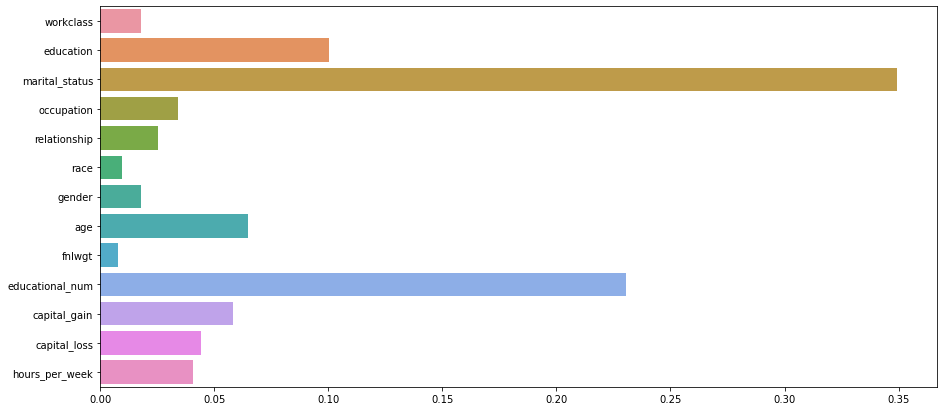

In [211]:
plt.figure(figsize=(15,7))
sns.barplot(x = xgb.feature_importances_, y = X_train.columns)
plt.show();


## Bagging - Random Forest with hyperparameter tunning

In [212]:
tuned_parameters = [{'max_depth':[i for i in range(1,20)]}]

rfcc = GridSearchCV(
    estimator= RandomForestClassifier(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

rfcc.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [213]:
print("Best parameters set found on train set")
print(rfcc.best_params_)
print(grid.best_estimator_)
print()

print('Score on Test Data: ', rfcc.score(X_test, y_test))

Best parameters set found on train set
{'max_depth': 18}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Score on Test Data:  0.8559283711675861


## Best parameters set found on train set {'max_depth': 18}

In [214]:
cv_results = pd.DataFrame(rfcc.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.477376,0.024772,0.037839,0.007856,1,{'max_depth': 1},0.769370,0.769370,0.769370,0.769370,...,0.769340,0.000060,19,0.769332,0.769332,0.769332,0.769332,0.769370,0.769340,0.000015
1,0.621750,0.011855,0.037553,0.007613,2,{'max_depth': 2},0.784142,0.785197,0.779319,0.786253,...,0.783117,0.002668,18,0.784029,0.789983,0.777962,0.786516,0.780374,0.783773,0.004277
2,0.756408,0.021066,0.041032,0.008024,3,{'max_depth': 3},0.821375,0.809466,0.822430,0.819717,...,0.818270,0.004616,17,0.822656,0.815006,0.819491,0.820320,0.819679,0.819430,0.002483
3,0.898709,0.018806,0.043053,0.004942,4,{'max_depth': 4},0.833283,0.833735,0.835243,0.835996,...,0.835695,0.002466,16,0.837202,0.837014,0.834790,0.834376,0.835092,0.835695,0.001178
4,1.045739,0.018804,0.047245,0.000724,5,{'max_depth': 5},0.835544,0.836147,0.839463,0.838710,...,0.838288,0.002212,15,0.839614,0.840971,0.840292,0.838069,0.837315,0.839252,0.001365


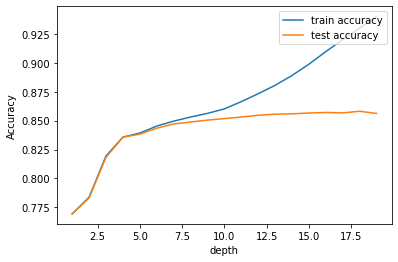

In [215]:
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])

plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')
plt.show()

In [216]:
rfcc = RandomForestClassifier(max_depth=16)
rfcc.fit(X_train, y_train)

RandomForestClassifier(max_depth=16)

In [217]:
y_train_predict = rfcc.predict(X_train)

In [218]:
score1 = accuracy_score(y_train,y_train_predict)
score1

0.9018691588785047

In [219]:
y_test_predict = rfcc.predict(X_test)

In [220]:
score2 = accuracy_score(y_test,y_test_predict)
score2

0.8546622049380483

In [221]:
con_matrix = metrics.confusion_matrix(y_test,y_test_predict)

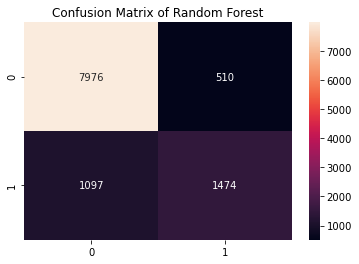

In [222]:
sns.heatmap(con_matrix,annot=True,fmt='d')
plt.title("Confusion Matrix of Random Forest")
plt.show()

## Using RandomForest Analysing Feature Importance


In [223]:
rfcc.feature_importances_

array([0.02791533, 0.06588633, 0.16051728, 0.04842355, 0.09694782,
       0.01143821, 0.02603797, 0.12293794, 0.07644393, 0.1197398 ,
       0.10860852, 0.06011888, 0.07498445])

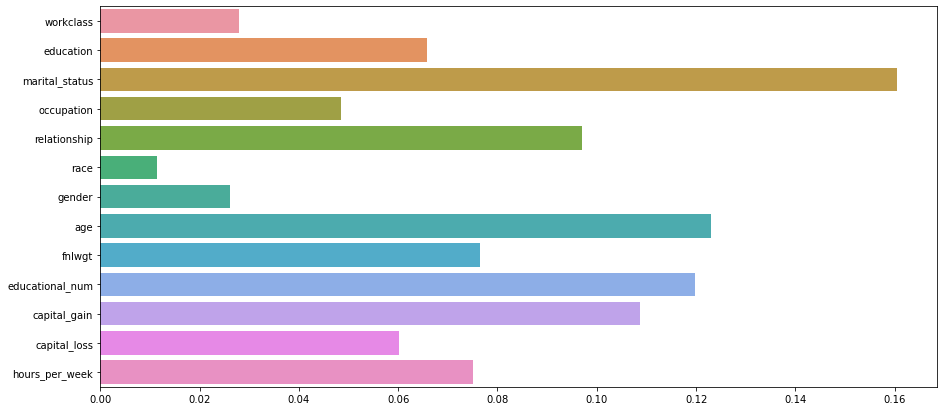

In [224]:
plt.figure(figsize=(15,7))
sns.barplot(x = rfcc.feature_importances_, y = X_train.columns)
plt.show();


# Conclusion : XGBoost is the best model with depth 3 is our Final Model with accuracy of 87% train and 86% test accuracy

## Using Boosting - XGBoost - Feature Engineering and  Hyperparameter Tunning

In [250]:
xgb.feature_importances_

array([0.09891316, 0.45693567, 0.06908   , 0.3036404 , 0.07143068],
      dtype=float32)

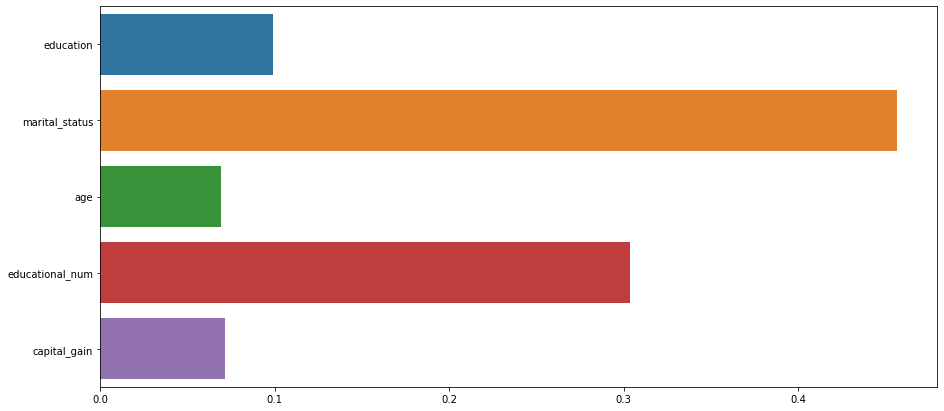

In [251]:
plt.figure(figsize=(15,7))
sns.barplot(x = xgb.feature_importances_, y = X_train.columns)
plt.show();


In [252]:
xgb = XGBClassifier(max_depth=3)

xgb.fit(X_train, y_train)

y_train_predict = xgb.predict(X_train)

score1 = accuracy_score(y_train,y_train_predict)
print(score1)

y_test_predict = xgb.predict(X_test)

score2 = accuracy_score(y_test,y_test_predict)
print(score2)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8487790171842026
0.8443519942118115


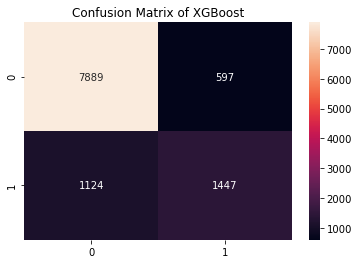

array([0.09891316, 0.45693567, 0.06908   , 0.3036404 , 0.07143068],
      dtype=float32)

In [253]:
con_matrix = metrics.confusion_matrix(y_test,y_test_predict)
sns.heatmap(con_matrix,annot=True,fmt='d')
plt.title("Confusion Matrix of XGBoost")
plt.show()
xgb.feature_importances_

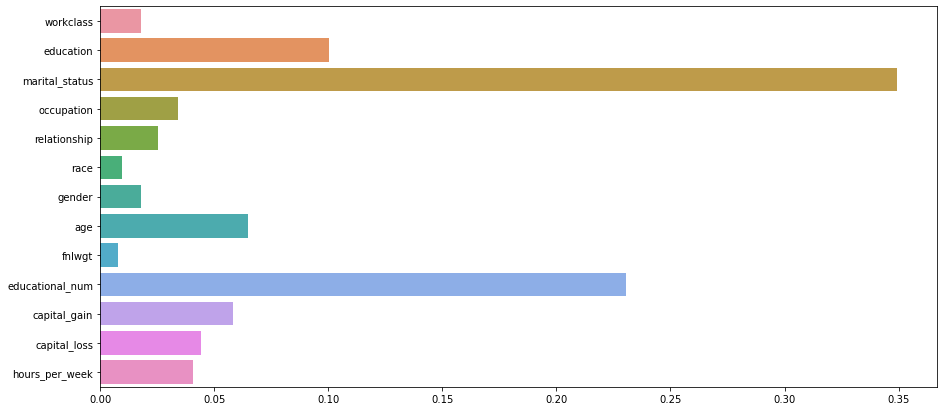

In [230]:
plt.figure(figsize=(15,7))
sns.barplot(x = xgb.feature_importances_, y = X_train.columns)
plt.show();


In [231]:
# Checking Dependency of the variables

crtab = pd.crosstab(X_train['capital_loss'],y_train)

In [232]:
test_statistic,p,dof,_=stats.chi2_contingency(crtab)


In [233]:
if p <0.05:
    print('There is no relation between the two variable')
else:
    print('There is some significance relation between the two variables')

# There is no relation between occupation,'hours_per_week','capital_loss' and income hence we can drop    

There is no relation between the two variable


In [234]:
X_train = X_train.drop(['fnlwgt','race','gender','workclass','relationship','occupation','hours_per_week','capital_loss'],axis=1)


In [235]:
X_test = X_test.drop(['fnlwgt','race','gender','workclass','relationship','occupation','hours_per_week','capital_loss'],axis=1)

### Checking for the XGBoost Model how it is working after removing some feature

In [237]:
xgb = XGBClassifier(max_depth=3)

xgb.fit(X_train, y_train)

y_train_predict = xgb.predict(X_train)

score1 = accuracy_score(y_train,y_train_predict)
print(score1)

y_test_predict = xgb.predict(X_test)

score2 = accuracy_score(y_test,y_test_predict)
print(score2)

[11:41:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8487790171842026
0.8443519942118115


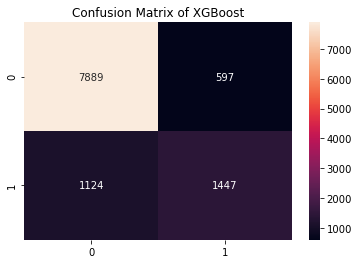

array([0.09891316, 0.45693567, 0.06908   , 0.3036404 , 0.07143068],
      dtype=float32)

In [238]:
con_matrix = metrics.confusion_matrix(y_test,y_test_predict)
sns.heatmap(con_matrix,annot=True,fmt='d')
plt.title("Confusion Matrix of XGBoost")
plt.show()
xgb.feature_importances_

In [239]:
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      8486
           1       0.71      0.56      0.63      2571

    accuracy                           0.84     11057
   macro avg       0.79      0.75      0.76     11057
weighted avg       0.84      0.84      0.84     11057



## Final Conclusion : XGBoost with six feature comes out to be best Model for predicting the income of the Adult People